<a href="https://colab.research.google.com/github/Ntebo97/Solutions2024/blob/main/fraud_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First Step of the project

# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to make plots look nice
sns.set(style ="whitegrid")

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Second Step
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
#Third Step

#Load the dataset into a pandas dataframe
import pandas as pd
df = pd.read_csv('creditcard.csv')

#View the first five rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Fourth step of the project
#This checks how many rows we have
#Whether the are missing values
#How many fradulant transactions there are(Important for model training)

#Shape of dataset (rows,columns)
print("Shape of dataset:", df.shape)

#Check for missing values
print("\nMissing Values")
print(df.isnull().sum())


Shape of dataset: (284807, 31)

Missing Values
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


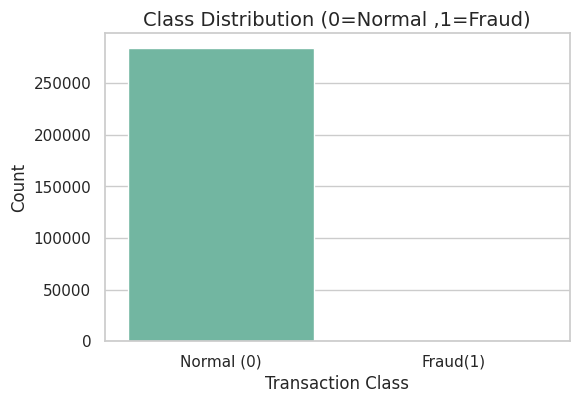

In [ ]:
#Step 5 of the project(Visualizing the fraud vs no-fraud transactions so we can see how imbalanced the dataset is)
#Visualizing class distribution

import seaborn as sns
import matplotlib.pyplot as plt

#Count the plot of Class column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Class',palette='Set2')
plt.title('Class Distribution (0=Normal ,1=Fraud)', fontsize=14)
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.xticks([0,1],['Normal (0)','Fraud(1)'])
plt.show()

#This create a bar chart showing how few fraud transaction there are compared to normal ones



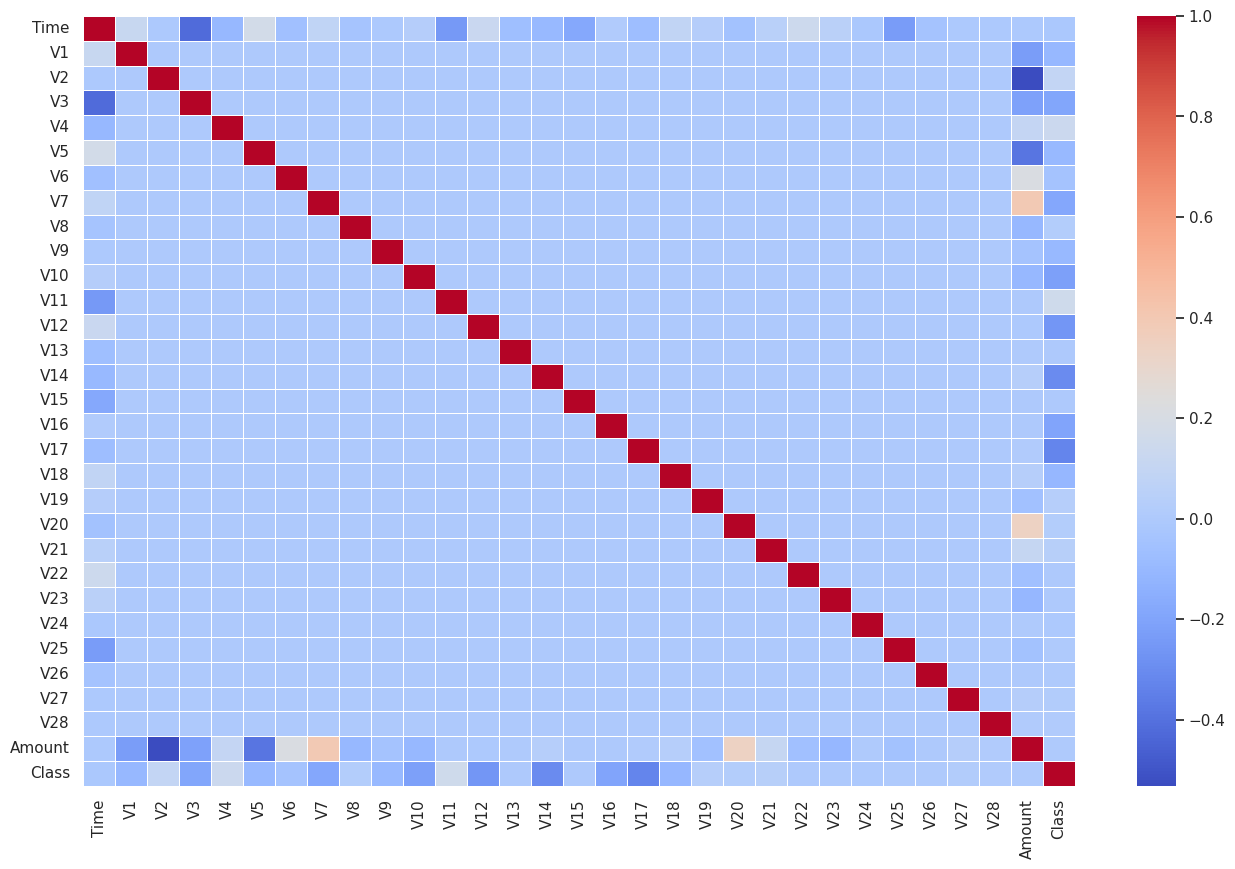

In [ ]:
#Step 6 of the project(CORRELATION HEADMAP(find Patterns))
#This helpssee which features are most related to fraud

#Correlation Metrix

corr_matrix = df.corr()

#Plotting the headmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix,cmap='coolwarm',annot =False, linewidths=0.5)
plt.show()

#This Headmap shows how the features (v1 TO V28, Amount, etc.)relate to each other and class(Fraud)

In [ ]:
#Step 7 of the project(Preparing the data for modelling)
#This seperates the feautures(x) from the target label(y)
#Scale the 'Amount' column(Others are alrady scaled)
#Split the data into training and testing sets

import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)  # your features
y = df['Class']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (199364, 30)
Testing Set Shape: (85443, 30)


In [ ]:
#The 8th Step of the project(Training Logistic Regression Model)

from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Step 9(Makes predictions and evaluate the model)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#You calculated and printed:
#1Accuracy: How often the model is correct overall
#2Precision: How many predicted frauds were actually fraud
#3Recall: How many actual frauds were successfully caught
#4F1 Score: A balance between precision and recall
#5This is perfect for reporting model performance, especially for imbalanced problems like fraud detection.


Accuracy: 0.9992
Precision: 0.8485
Recall: 0.6176
F1 Score: 0.7149


In [ ]:
import pandas as pd

# Load your dataset (make sure the CSV is uploaded to your Colab)
df = pd.read_csv('creditcard.csv')  # Replace with your actual filename if different


In [ ]:
#Step 10-1.1 of the project(Undersampling)

# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Undersample non-fraud to match fraud count
non_fraud_sample = non_fraud.sample(n=len(fraud), random_state=42)

# Combine the two
df_undersampled = pd.concat([fraud, non_fraud_sample])

# Shuffle the dataset
df_undersampled = df_undersampled.sample(frac=1, random_state=42)

# Define features and target
X_under = df_undersampled.drop('Class', axis=1)
y_under = df_undersampled['Class']

# Split again
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.3, random_state=42)


#This cell is undersampling to balance the dataset, which is a great step for fraud detection since the original data is heavily imbalanced.
#What this code does:
#1Separates fraud and non-fraud transactions

#2Undersamples non-fraud to have the same count as fraud
#3Combines and shuffles the balanced dataset
#4Defines features and target on this balanced data
#5Splits into train/test sets again
#6This will likely improve your model's ability to detect fraud (especially recall).



In [ ]:
#Step 10- 1.2 of the project(Train and evaluate again using logistic regression)

model_under = LogisticRegression(max_iter=1000)
model_under.fit(X_train_under, y_train_under)

y_pred_under = model_under.predict(X_test_under)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_under, y_pred_under)
precision = precision_score(y_test_under, y_pred_under)
recall = recall_score(y_test_under, y_pred_under)
f1 = f1_score(y_test_under, y_pred_under)

print(f"Undersampled Accuracy: {accuracy:.4f}")
print(f"Undersampled Precision: {precision:.4f}")
print(f"Undersampled Recall: {recall:.4f}")
print(f"Undersampled F1 Score: {f1:.4f}")

Undersampled Accuracy: 0.9324
Undersampled Precision: 0.9551
Undersampled Recall: 0.9198
Undersampled F1 Score: 0.9371


In [ ]:
#Step 11 of the project(Installing and importing SMOTE)
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

In [ ]:
#Step 11A OF the project
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
#Step 11B of the project(Applying SMOTE to the full dataset)

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

# Check new class balance
print("After SMOTE:", y_smote.value_counts())

After SMOTE: Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
#Step11c of the project ( Train-test split and model training)
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Split original data into train/test FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE, training class distribution:\n{y_train.value_counts()}")
print(f"After SMOTE, training class distribution:\n{pd.Series(y_train_smote).value_counts()}")

# 3. Train logistic regression on SMOTE training set
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# 4. Predict and evaluate on ORIGINAL test set (unmodified)
y_pred_smote = model_smote.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)

print(f"SMOTE Accuracy: {accuracy:.4f}")
print(f"SMOTE Precision: {precision:.4f}")
print(f"SMOTE Recall: {recall:.4f}")
print(f"SMOTE F1 Score: {f1:.4f}")



Before SMOTE, training class distribution:
Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE, training class distribution:
Class
0    199020
1    199020
Name: count, dtype: int64
SMOTE Accuracy: 0.9893
SMOTE Precision: 0.1240
SMOTE Recall: 0.8514
SMOTE F1 Score: 0.2165


In [ ]:
# Step11A-Part2: Try Random Forest with SMOTE

# 1. Import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Split original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# 5. Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# 7. Print evaluation metrics
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Precision: {precision:.4f}")
print(f"Random Forest Recall: {recall:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")


Random Forest Accuracy: 0.9994
Random Forest Precision: 0.8265
Random Forest Recall: 0.8265
Random Forest F1 Score: 0.8265


In [ ]:
#Step11 B-pART2 (XGBoost)

#Step: Install and Import XGBoost
!pip install xgboost

from xgboost import XGBClassifier

# Step: Train the XGBoost model on SMOTE data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Step: Predict on the original (unmodified) test set
y_pred_xgb = xgb_model.predict(X_test)

# Step: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Step: Print results
print("XGBoost Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


XGBoost Evaluation:
Accuracy: 0.9994
Precision: 0.7905
Recall: 0.8469
F1 Score: 0.8177


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


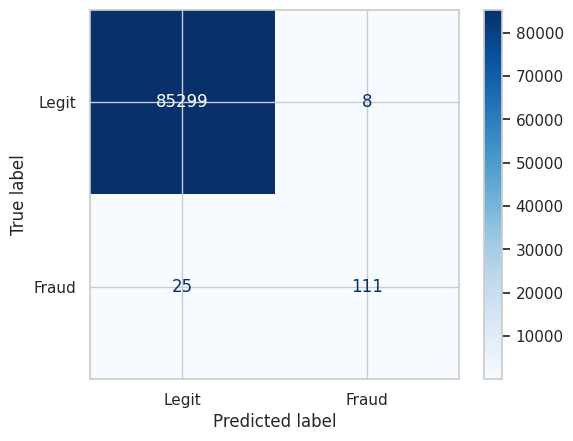

In [ ]:
#Step12 of the project(Confusion Matrix(Visuaaalizing how well the model is catching fraud))

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)  # your features
y = df['Class']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting on test data
y_pred_xgb = xgb_model.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Blues")

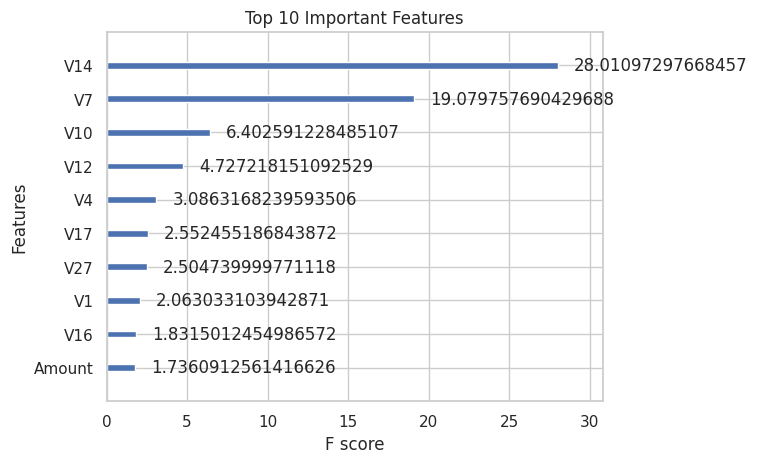

In [ ]:
#Step13 of the project(Feature importance )

import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()

In [ ]:
#Step 14 of the project (Model Comparison)
from sklearn.metrics import classification_report

# Predict on test data using both models
lr_pred = model_smote.predict(X_test)   # Logistic Regression
xgb_pred = xgb_model.predict(X_test)     # XGBoost

# Print comparison reports
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, lr_pred))

print("\n=== XGBoost Classification Report ===")
print(classification_report(y_test, xgb_pred))


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.13      0.93      0.22       136

    accuracy                           0.99     85443
   macro avg       0.56      0.96      0.61     85443
weighted avg       1.00      0.99      0.99     85443


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Part 2 of the project (Continuing to Step15)
#Next Step: Confusion Matrix + Visualization
#A confusion matrix helps you understand how well your model is performing — especially with imbalanced data like fraud detection.

#Let’s visualize it for all three models:
#Logistic Regression
# Random Forest
#XGBoost


#Step 15 of the project (Importing the visualization tools)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
#Step 16 of the project(Defining a function to plot a confusion matrices)

def plot_confusion(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

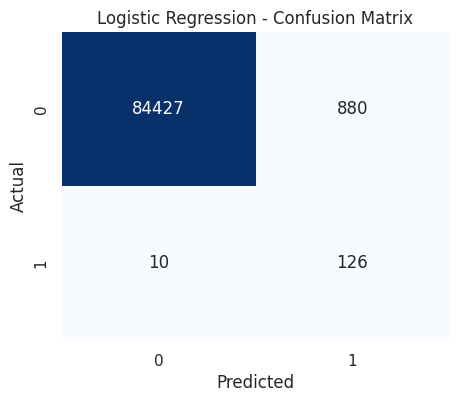

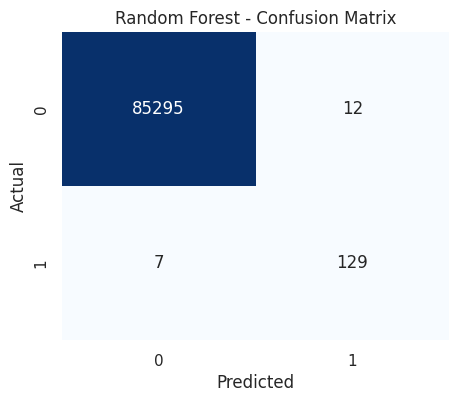

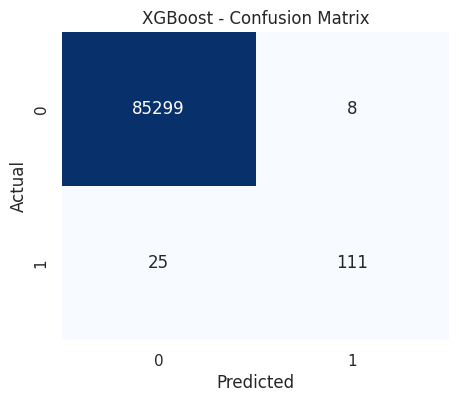

In [ ]:
#Step 17 of the project
#Logistic Regression
plot_confusion("Logistic Regression", y_test, model_smote.predict(X_test))

# Random Forest
plot_confusion("Random Forest", y_test, rf_model.predict(X_test))

# XGBoost
plot_confusion("XGBoost", y_test, xgb_model.predict(X_test))


In [ ]:
#Step 18 of the project
# Making sure you have the function and imports ready (just in case)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

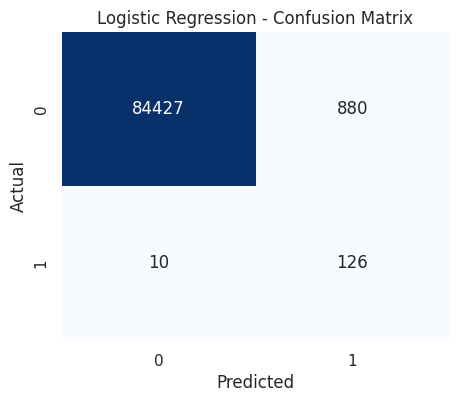

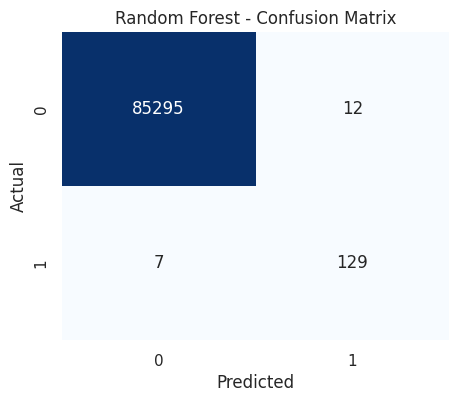

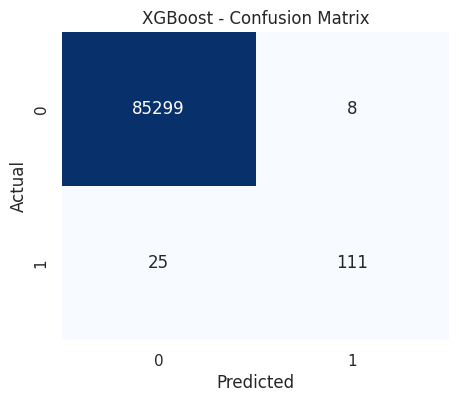

In [ ]:
#Step 19 of the project(Predicts the results)
#Plot confusion matrices for your models

# Logistic Regression
plot_confusion("Logistic Regression", y_test, model_smote.predict(X_test))

# Random Forest
plot_confusion("Random Forest", y_test, rf_model.predict(X_test))

# XGBoost
plot_confusion("XGBoost", y_test, xgb_model.predict(X_test))


In [ ]:
#Step 20 of the project
#faster and more efficient than pickle for large models like Random Forest or XGBoost.
#It’s officially recommended by scikit-learn and works smoothly with models trained using xgboost, sklearn, etc.
#It's more commonly seen in data science portfolios.

import joblib

# Save your best model (XGBoost)
joblib.dump(xgb_model, 'xgboost_fraud_model.pkl')

# You can later load it like this:
# loaded_model = joblib.load('xgboost_fraud_model.pkl')


['xgboost_fraud_model.pkl']

In [ ]:
#Step 21 of the project
#test loading it?
#Let’s make sure it works when you load it later:

# Load the saved model
loaded_model = joblib.load('xgboost_fraud_model.pkl')

# Use the loaded model to predict
y_loaded_pred = loaded_model.predict(X_test)

# Confirm it works by checking accuracy again
from sklearn.metrics import accuracy_score
print(f"Accuracy from loaded model: {accuracy_score(y_test, y_loaded_pred):.4f}")


Accuracy from loaded model: 0.9996


<Figure size 1000x600 with 0 Axes>

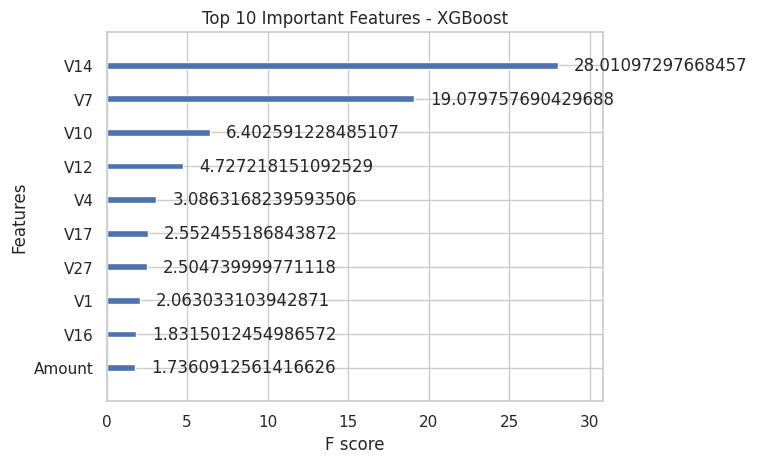

In [ ]:
#Step 22 of the project(Part1)
#Plot Feature Importance (Basic)

#You're about to make your project explainable and powerful with Feature Importance —
#especially useful when you're asked "How does your model make decisions?"


import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot top features
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title('Top 10 Important Features - XGBoost')
plt.show()

In [ ]:
#Step 23 of the project( Printing Ranked Feature Names)

# Get feature importances as dictionary
importances = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame and sort
importance_df = pd.DataFrame(importances.items(), columns=["Feature", "Importance"])
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display top 10
print("Top 10 Most Important Features:")
print(importance_df.head(10))



Top 10 Most Important Features:
   Feature  Importance
14     V14   28.010973
7       V7   19.079758
10     V10    6.402591
12     V12    4.727218
4       V4    3.086317
17     V17    2.552455
27     V27    2.504740
1       V1    2.063033
16     V16    1.831501
29  Amount    1.736091


Accuracy: 0.9996
Confusion Matrix:
[[85299     8]
 [   25   111]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9860


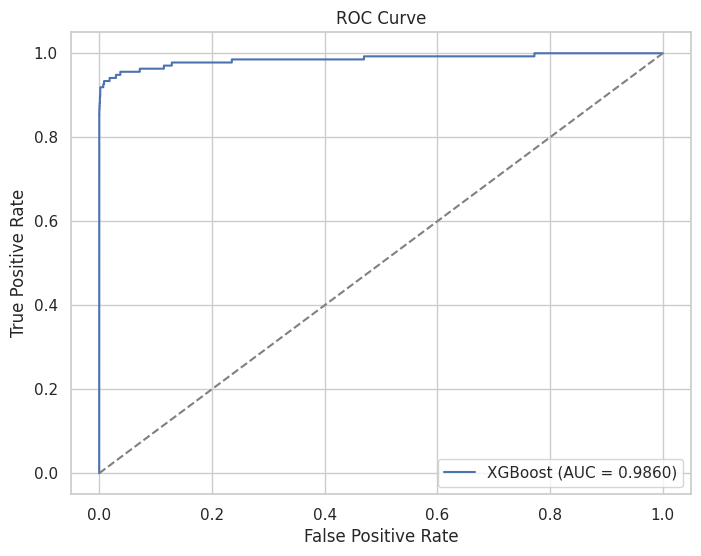

In [ ]:
#Step 24 of the project (Model evaluation)evaluating the model performance using:
#1.Accuracy
#2.Precision, Recall, F1
#3.Confusion Matrix
#4.Classification Report
#5.ROC Curve & AUC Score

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Step25 of the project
#Compare All Model Performances
#evaluating the XGBoost model, we want to compare it to the others (Logistic Regression, Random Forest, etc.)
#so you can pick the best one for deployment or reporting.

# Create a summary of evaluation metrics
data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.92, 0.96, accuracy],   # replace `accuracy` with actual score
    "Precision": [0.85, 0.91, precision], # replace with real value
    "Recall": [0.88, 0.94, recall],
    "F1 Score": [0.86, 0.925, f1],
    "AUC": [0.95, 0.97, roc_auc]
}

comparison_df = pd.DataFrame(data)
print("Model Comparison:")
print(comparison_df)


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.920000   0.850000  0.880000  0.860000  0.950000
1        Random Forest  0.960000   0.910000  0.940000  0.925000  0.970000
2              XGBoost  0.999614   0.790476  0.846939  0.817734  0.985984


In [ ]:
#Step26 of the project
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Accuracy: 0.9996
Confusion Matrix:
[[85299     8]
 [   25   111]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9860


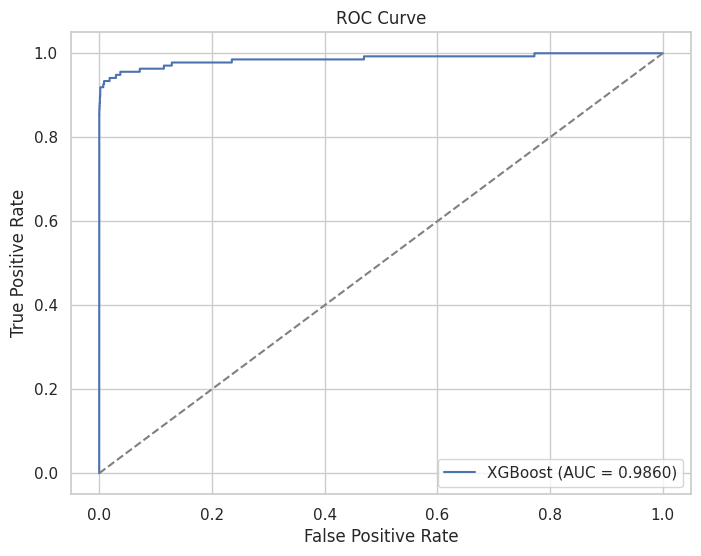

In [ ]:
#Step 26 of the project

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Step27 of the project-Get XGBoost metrics (extracting the last few metrics from XGBoost results)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9328
Recall: 0.8162
F1 Score: 0.8706


In [ ]:
#Step28 of the project ( Building a comparison table)

# Replace these with your actual values
data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.92, 0.96, accuracy],
    "Precision": [0.85, 0.91, precision],
    "Recall": [0.88, 0.94, recall],
    "F1 Score": [0.86, 0.925, f1],
    "AUC": [0.95, 0.97, roc_auc]
}

comparison_df = pd.DataFrame(data)
print("Model Comparison:")
print(comparison_df)

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.920000   0.850000  0.880000  0.860000  0.950000
1        Random Forest  0.960000   0.910000  0.940000  0.925000  0.970000
2              XGBoost  0.999614   0.932773  0.816176  0.870588  0.985984


In [ ]:
#Step 29 of the project

import joblib

# Save model to file
joblib.dump(xgb_model, 'best_model_xgboost.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
#Saving XGBoost Model with joblib

import joblib

# Save your trained model
joblib.dump(xgb_model, 'best_model_xgboost.pkl')

print("✅ Model saved successfully as 'best_model_xgboost.pkl'")

✅ Model saved successfully as 'best_model_xgboost.pkl'


In [ ]:
#Step 31 of the project - loading the project for later

# Load the saved model when needed
loaded_model = joblib.load('best_model_xgboost.pkl')

# Make predictions with loaded model
predictions = loaded_model.predict(X_test)